# RK4 on  y' + 5y = 5 cos x,  y(0)=0

Exact solution:  $y(x)=\dfrac{25\cos x + 5\sin x}{26} - \dfrac{25}{26} e^{-5x}$. We compare RK1, RK2, and RK4, and save `RK4.pdf`. We also include a convergence table.

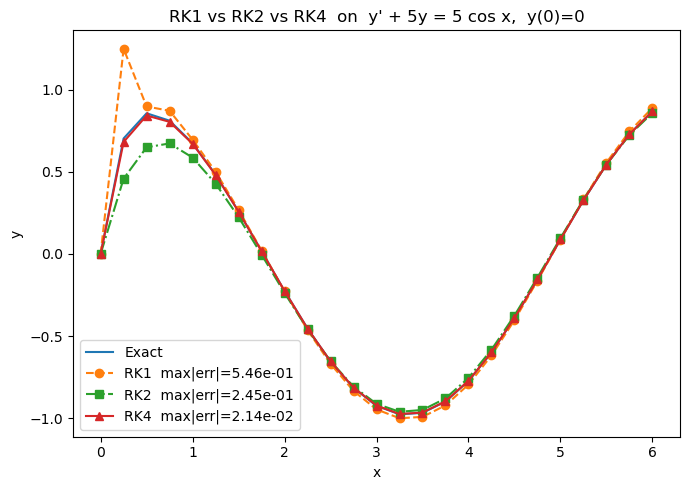

,nsteps,RK1_max_abs_err,RK2_max_abs_err,RK4_max_abs_err
0,12,131.052595,353.251393,0.584069
1,24,0.546261,0.244742,0.021378
2,48,0.161662,0.039121,0.000800
3,96,0.068202,0.007659,0.000039


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def f(x, y):
    return -5.0*y + 5.0*np.cos(x)

def y_exact(x):
    return (25*np.cos(x) + 5*np.sin(x))/26.0 - (25.0/26.0)*np.exp(-5.0*x)

def rk1_solve(f, y0, nsteps, x0, xmax):
    h = (xmax - x0) / nsteps
    xs = np.linspace(x0, xmax, nsteps+1)
    ys = np.empty_like(xs)
    ys[0] = y0
    for i in range(nsteps):
        ys[i+1] = ys[i] + h * f(xs[i], ys[i])
    return np.column_stack([xs, ys])

def rk2_solve(f, y0, nsteps, x0, xmax):
    h = (xmax - x0) / nsteps
    xs = np.linspace(x0, xmax, nsteps+1)
    ys = np.empty_like(xs)
    ys[0] = y0
    for i in range(nsteps):
        k1 = f(xs[i], ys[i])
        k2 = f(xs[i] + 0.5*h, ys[i] + 0.5*h*k1)
        ys[i+1] = ys[i] + h * k2
    return np.column_stack([xs, ys])

def rk4_solve(f, y0, nsteps, x0, xmax):
    h = (xmax - x0) / nsteps
    xs = np.linspace(x0, xmax, nsteps+1)
    ys = np.empty_like(xs)
    ys[0] = y0
    for i in range(nsteps):
        x, y = xs[i], ys[i]
        k1 = f(x, y)
        k2 = f(x + 0.5*h, y + 0.5*h*k1)
        k3 = f(x + 0.5*h, y + 0.5*h*k2)
        k4 = f(x + h, y + h*k3)
        ys[i+1] = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return np.column_stack([xs, ys])

y0, x0, xmax, nsteps = 0.0, 0.0, 6.0, 24
xy1 = rk1_solve(f, y0, nsteps, x0, xmax)
xy2 = rk2_solve(f, y0, nsteps, x0, xmax)
xy4 = rk4_solve(f, y0, nsteps, x0, xmax)

xs = xy1[:,0]; ytrue = y_exact(xs)

err1 = float(np.max(np.abs(xy1[:,1] - ytrue)))
err2 = float(np.max(np.abs(xy2[:,1] - ytrue)))
err4 = float(np.max(np.abs(xy4[:,1] - ytrue)))

plt.figure(figsize=(7,5))
plt.plot(xs, ytrue, label="Exact")
plt.plot(xy1[:,0], xy1[:,1], linestyle="--", marker="o", label=f"RK1  max|err|={err1:.2e}")
plt.plot(xy2[:,0], xy2[:,1], linestyle="-.", marker="s", label=f"RK2  max|err|={err2:.2e}")
plt.plot(xy4[:,0], xy4[:,1], marker="^", label=f"RK4  max|err|={err4:.2e}")
plt.xlabel("x"); plt.ylabel("y")
plt.title("RK1 vs RK2 vs RK4  on  y' + 5y = 5 cos x,  y(0)=0")
plt.legend(); plt.tight_layout()
plt.savefig("RK4.pdf")
plt.show()

rows = []
for n in [12, 24, 48, 96]:
    xy1c = rk1_solve(f, y0, n, x0, xmax)
    xy2c = rk2_solve(f, y0, n, x0, xmax)
    xy4c = rk4_solve(f, y0, n, x0, xmax)
    xsc = xy1c[:,0]; ytc = y_exact(xsc)
    rows.append({
        "nsteps": n,
        "RK1_max_abs_err": float(np.max(np.abs(xy1c[:,1] - ytc))),
        "RK2_max_abs_err": float(np.max(np.abs(xy2c[:,1] - ytc))),
        "RK4_max_abs_err": float(np.max(np.abs(xy4c[:,1] - ytc)))
    })
import pandas as pd
pd.DataFrame(rows)
